# Arctic Sea Ice Analysis

## About the Dataset

Kaggle has shared a very extensive dataset of the extent of sea-ice data originally provided by NSIDC (The National Snow and Ice Data Center). The data was collected every other day since 1978 and daily since around 1988 over the span of 37 years from 1978 to 2015.

The data set consists of 6 variables: 

* 1) Year
* 2) Month 
* 3) Day 
* 4) Extent: of ice, in 10^6 sq.kms 
* 5) Missing: ice cover, in 10^6 sq.kms 
* 6) Hemisphere: Northern or Southern

## Problem Statement
In Sep 2012, it was reported that Arctic Ice had melted to its lowest/minima ever even lower than that in 2004. 

The aim of this analysis is to visualize the data set on a time axis to analyze the melting pattern of sea ice over time. Plotting the melting patterns of both northern hemisphere and southern hemisphere helps us understand where the impact of global warming may be more.

### Exercise
* Exploratory data analysis and visualisation of that data, 
* Predictions into the sea-ice levels in the future.

Steps to follow:
1. Create a dataframe and load the data into the dataframe. This step has been performed for you. A dataframe called 'seaice_df' has been created and the dataset available at a remote server location is loaded into the dataframe.<br>
<br>Recommended reading:
    * Lesson on Dataframes in Junior Data Scientist/Data Analyst course on Refactored Platform
    * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
    * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
<br>
<br>
2. Observe the dataset and consider combining the year, month and day columns into a single consolidated column which enables plotting of data on a date axis.<br>
<br>Recommended reading:
    * Lesson on Dataframes in Junior Data Scientist/Data Analyst course on Refactored Platform
    * http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html
<br>
<br>
3. One objective of the analysis is to compare the ice melt patterns of northern hemisphere to southern hemisphere. Splitting the dataframe into two parts, 'north_hem' and 'south_hem' containing data of their respective hemisphere is recommended for carrying out this comparative analysis.<br>
<br>Recommended reading:
    * Lesson on Dataframes in Junior Data Scientist/Data Analyst course on Refactored Platform
    * https://pandas.pydata.org/pandas-docs/stable/indexing.html
<br>
<br>
4. The original dataset also segregates the ice melt extent according to hemisphere by having a column which mentions the hemisphere in which that particular ice melt extent was recorded. If global ice melt is to be plotted, the ice melt in northern and southern hemisphere, on any given day, should be added and plotted on Y-axis while 'dates' are populated in X-axis. So consider creating another dataframe (total_ext_df) from 'seaice_df'.<br>
<br>Recommended reading:
    * Lesson on Dataframes in Junior Data Scientist/Data Analyst course on Refactored Platform
    * https://pandas.pydata.org/pandas-docs/stable/indexing.html
    * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
    * https://docs.python.org/2/library/functions.html
<br>
<br>
5. Once the data is massaged and ready for visualization, use various seaborn visualization plots to summarize the data in a graph. The first thing you can try is a time series plot (seaborn.tsplot) which is best to visualize this dataset as it is a time series. Next, you can try visualizing the same ice melt extent time series across northern hemisphere vs southern hemisphere, aggregated by each 'year'. The monthly mean melting extent can be viewed in a heatmap. Annual ice melt extent can be plotted on a tsplot. And finally, a regression plot can be used to predict the trend of ice melt extent.
<br>Recommended reading:
    * Lesson on Data Visualization in Junior Data Scientist/Data Analyst course on Refactored Platform
    * http://seaborn.pydata.org/generated/seaborn.tsplot.html
    * https://seaborn.pydata.org/generated/seaborn.regplot.html
    * https://seaborn.pydata.org/generated/seaborn.heatmap.html
<br>


And thus trying to answer the following questions:
1. Do changes in sea ice differ between the two hemispheres?
2. What are the trends of sea ice melting observed using the regression plots?

In [2]:
# Pre-loaded code

%matplotlib inline 
from matplotlib.offsetbox import AnchoredText
import numpy as np 
import pandas as pd 
import datetime as dt
import itertools
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

 
plt.style.use('ggplot')
# reading in data from the provided csv file
seaice_df = pd.read_csv('https://s3.amazonaws.com/refactored/lab_data/seaice_analysis_input.csv',encoding='utf-8')
seaice_df.head()

,Year,Month,Day,Extent,Missing,hemisphere
0,1978,10,26,10.231,0.0,north
1,1978,10,28,10.420,0.0,north
2,1978,10,30,10.557,0.0,north
3,1978,11,1,10.670,0.0,north
4,1978,11,3,10.777,0.0,north


# Solution

### Distinguish Northern & Southern Hemisphere Dataset

Convert the 3 column date format to datetime format and set it as the index.

In [3]:
# Solution

seaice_df['Date'] = pd.to_datetime(seaice_df[['Year','Month','Day']])
seaice_df.index = seaice_df['Date'].values
seaice_df.head()

,Year,Month,Day,Extent,Missing,hemisphere,Date
1978-10-26,1978,10,26,10.231,0.0,north,1978-10-26
1978-10-28,1978,10,28,10.420,0.0,north,1978-10-28
1978-10-30,1978,10,30,10.557,0.0,north,1978-10-30
1978-11-01,1978,11,1,10.670,0.0,north,1978-11-01
1978-11-03,1978,11,3,10.777,0.0,north,1978-11-03


Split according to hemisphere, as we are expecting different trends for each

In [4]:
north_hem = seaice_df[seaice_df['hemisphere'] == 'north']
south_hem = seaice_df[seaice_df['hemisphere'] == 'south']

Alternatively, if the global ice melt extent needs to be visualized, irrespective of hemisphere, then the north hemisphere and south hemisphere data should be aggregated on a daily basis. This can be acheived by performed a sum operation on values while grouping them using the 'Date' index. The following code shows how to create an aggregated subset from the dataframe.

In [5]:
total_ext_df = pd.DataFrame(seaice_df[['Extent','Date']].groupby('Date').sum())
total_ext_df.head()

,Extent
Date,
1978-10-26,27.855
1978-10-28,28.223
1978-10-30,28.227
1978-11-01,28.197
1978-11-03,28.263


## Data Visualization

Daily sea-ice extent is defined as the trend of ice melting and refreezing. Ice melting and refreezing is captured on a daily basis for 37 years.

### Visualization of total annual ice melt extent

We have created a dataframe with total extent of ice melt across both hemispheres in the previous exercise. Let us try to visualize it in a time series plot, plotting 'Extent' variable on Y-axis and the 'Date' index on X-axis. Read more about the tsplot function in seaborn library to generate a time series plot (Link: http://seaborn.pydata.org/generated/seaborn.tsplot.html).

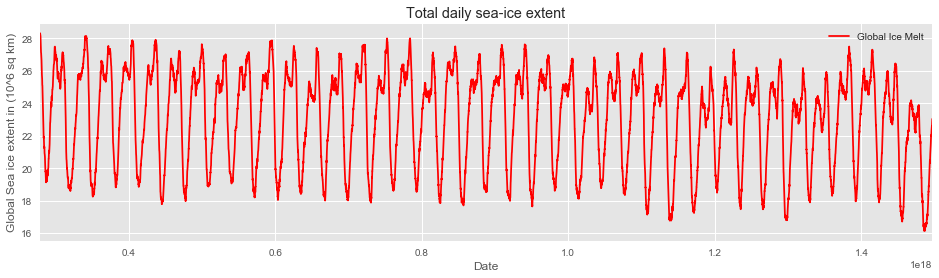

In [38]:
plt.subplots(figsize=(16, 4))
sns.tsplot(total_ext_df['Extent'], time=total_ext_df.index, condition='Global Ice Melt', color='red')

plt.ylabel('Global Sea ice extent in (10^6 sq km)')
plt.xlabel('Date')
plt.title('Total daily sea-ice extent')

The pattern of ice melt looks very cyclical and this is explainable using the seasonal variations in temperature across a given year. Now we can also visualize the ice melt extent in each of the two hemispheres - north and south.

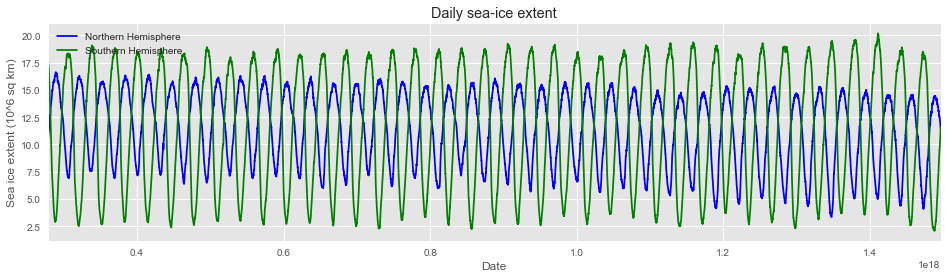

In [33]:
sns.tsplot(north_hem['Extent'], time=north_hem['Date'], condition='Northern Hemisphere', color='blue')
sns.tsplot(south_hem['Extent'], time=south_hem['Date'], condition='Southern Hemisphere', color='green')

plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Daily sea-ice extent')

### Analysis of Daily Sea-Ice Extent

We can see there are autonomous maxima and minima for the northern and southern side of the equator informational collections, obviously from the change of season. Additionally, southern side of the equator has general more ocean ice than the northern at whenever of the year. 

The long haul pattern of every day ice plot gives us a feeling that there is a generally steady sum in winter months and in addition in summer months; however there is unquestionably a descending pattern in both the maxima(winter months add up to snow) and minima(summer months add up to snow) with solid declining pattern for Northern Hemisphere.

### Resampling Raw Data into Annual Averages

In [9]:
north_hem_annavg = north_hem['01-01-1979':'31-12-2016'].resample('12M').mean()
south_hem_annavg = south_hem['01-01-1979':'31-12-2016'].resample('12M').mean()

(1977, 2016)

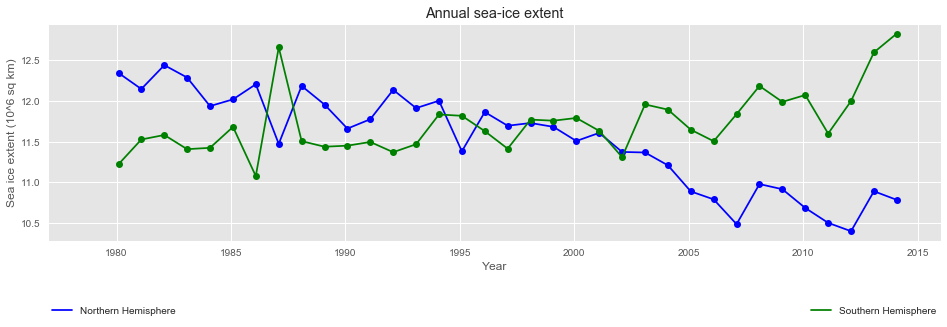

In [34]:
# remove the initial and final item as they aer averaged incorrectly (also indexes seem bad)
north_hem_annavg = north_hem_annavg[1:-1]
south_hem_annavg = south_hem_annavg[1:-1]

plt.subplots(figsize=(16, 4))
sns.tsplot(north_hem_annavg['Extent'], time=north_hem_annavg['Year'], condition='Northern Hemisphere', color='blue')
sns.tsplot(north_hem_annavg['Extent'], time=north_hem_annavg['Year'], color='blue', interpolate=False)
sns.tsplot(south_hem_annavg['Extent'], time=south_hem_annavg['Year'], condition='Southern Hemisphere', color='green')
sns.tsplot(south_hem_annavg['Extent'], time=south_hem_annavg['Year'], color='green', interpolate=False)
# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Year')
plt.title('Annual sea-ice extent')
plt.xlim(1977, 2016)

## Annual Extent
Here, we can watch the general pattern that there has been a consistent reduction in the degree of ocean ice in the northern side of the equator, the degree of ocean ice in the southern side of the equator was moderately steady until the mid 2000s, and from that point forward has been expanding, at first this appeared to be an exceptionally unusual outcome, this has been known for quite a while and is because of an extensive number of confounded elements. 

One of the key patterns saw in the ascent of an Earth-wide temperature boost is that occasional marvels appear to be moving to prior and prior in the year, how about we check whether we can watch this in the dissolving and re-solidifying of ocean ice in the polar locales

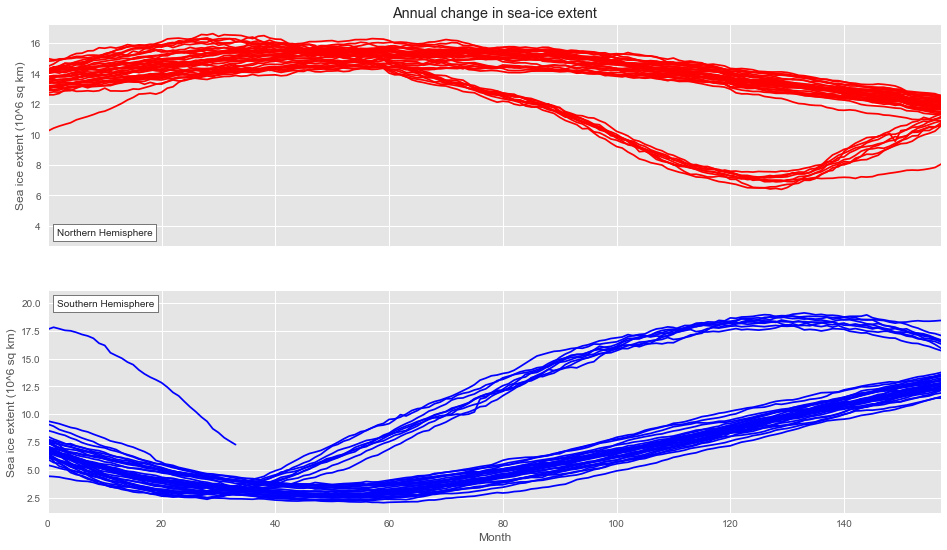

In [35]:
start = 1978
end = dt.datetime.now().year + 1

f, ax = plt.subplots(2, sharex=True, figsize=(16,9))

fmt_month = mdates.DateFormatter('%b')

ax[0].set_ylabel('Sea ice extent (10^6 sq km)')
ax[1].set_ylabel('Sea ice extent (10^6 sq km)')
ax[1].set_xlabel('Month')
ax[0].set_title('Annual change in sea-ice extent');
ax[0].add_artist(AnchoredText('Northern Hemisphere', loc=3))
ax[1].add_artist(AnchoredText('Southern Hemisphere', loc=2))

for year in range(start, end):
    # create new dataframe for each year, 
    # and set the year to 1972 so all are plotted on the same axis
    north_hem_yr = north_hem[['Extent', 'Day', 'Month']][north_hem['Year'] == year]
    north_hem_yr['Year'] = 1972
    north_hem_yr['Date'] = pd.to_datetime(north_hem_yr[['Year','Month','Day']])
    north_hem_yr.index = north_hem_yr['Date'].values
    
    south_hem_yr = south_hem[['Extent', 'Day', 'Month']][south_hem['Year'] == year]
    south_hem_yr['Year'] = 1972
    south_hem_yr['Date'] = pd.to_datetime(south_hem_yr[['Year','Month','Day']])
    south_hem_yr.index = south_hem_yr['Date'].values
    
    sns.tsplot(north_hem_yr['Extent'], color='r', ax=ax[0])
    sns.tsplot(south_hem_yr['Extent'], color='b', ax=ax[1])

### Annual Variations in sea ice by months
In this figure the older data are coloured green, shifting towards blue in the current data.

From this data we can clearly see that there is a shift in the positions of the maxima and minima of the sea ice extent in both the northern and southern hemispheres, indicating that the seasons have been gradually shifting over time.

In the northern hemisphere data there is a marked difference between the first and final year data, clearly highlighting the decrease in the extent of sea ice year on year. The southern hemisphere has been much more uniform over the same time period, indicating that the extent of sea-ice melting over this period has been much lesser and stable.

## Seasonal March of Sea Ice Extent during 1979-2015

This section explores how the seasonal variations of sea ice extents have changed during 1979-2015. As the variation of sea ice extent is small within a month, the monthly mean would be used in the following analysis.

In [36]:
# Obtain Monthly data
north_month, south_month = north_hem.resample('1M').mean(), south_hem.resample('1M').mean()
for monthly,data,hemisphere in zip([north_month,south_month],[north_hem,south_hem],['North / Arctic','South / Antarctic']):
    monthly['Month'] = monthly['Month'].apply(lambda x:int(x))
    monthly['Year'] = monthly['Year'].apply(lambda x:int(x))

### Monthly mean
- In which month does the maximum / minimum of sea ice extent occur?
- Are there changes in seasonal variation (e.g. range) over the years?

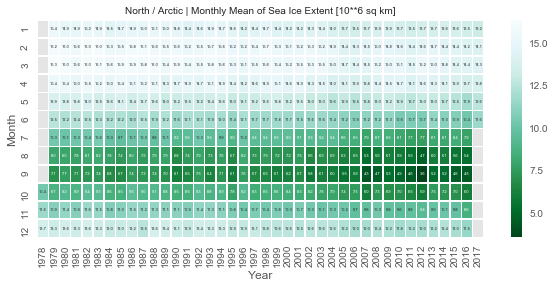

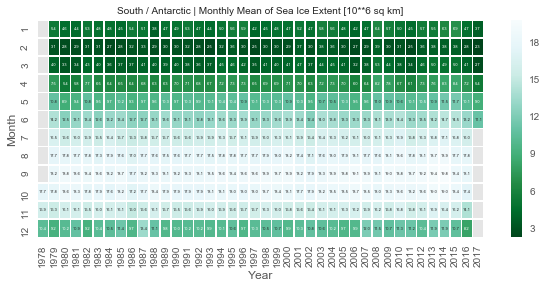

In [37]:
for monthly,hemisphere in zip([north_month,south_month],['North / Arctic','South / Antarctic']):
    plt.figure(figsize=(10,4))
    month_pivot = monthly.pivot("Month", "Year", "Extent")
    plt.title(hemisphere+' | Monthly Mean of Sea Ice Extent [10**6 sq km]',size=10)
    sns.heatmap(month_pivot, annot=True, fmt="1.1f", linewidths=.5,cmap='BuGn_r',annot_kws={"size":4})

### Observations:
Cold (Northern half of the globe) ocean ice has greatest degree in February and least degree in September. 
Antarctic (Southern half of the globe) ocean ice then again does precisely inverse. 
An unmistakable diminishing pattern of Arctic ocean ice degree month to month mean is seen in August to October. 
Are there patterns in long stretches of ocean ice degree minima/maxima (i.e. Feb/Sep)?

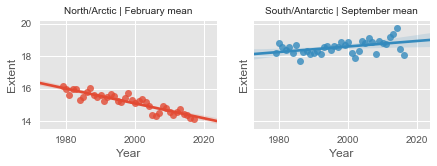

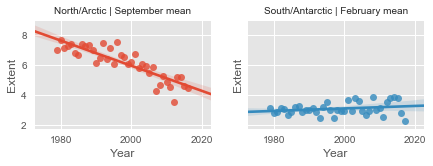

In [38]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharex='row',sharey='row',figsize=(7,2))
sns.regplot(x="Year", y="Extent", data=north_month[north_month.Month==2],ax=ax1)
ax1.set_title('North/Arctic | February mean',size=10)
sns.regplot(x="Year", y="Extent", data=south_month[south_month.Month==9],ax=ax2)
ax2.set_title('South/Antarctic | September mean',size=10)

fig2, ((ax3, ax4)) = plt.subplots(1, 2, sharex='row',sharey='row',figsize=(7,2))
sns.regplot(x="Year", y="Extent", data=north_month[north_month.Month==9],ax=ax3)
ax3.set_title('North/Arctic | September mean',size=10)
sns.regplot(x="Year", y="Extent", data=south_month[south_month.Month==2],ax=ax4)
ax4.set_title('South/Antarctic | February mean',size=10)

### Observations:
Cold (Northern side of the equator) ocean ice has a hearty diminishing pattern in both February (most extreme degree) and September (least degree). 

Antarctic (Southern half of the globe) ocean ice has a pitifully expanding pattern in both February (least degree) and September (most extreme degree). 

The base ocean ice degree every year for the Arctic is diminishing at a rate of ~8 x 10^4 sq km/year. 

Looking at the rates of progress between the half of the globe, the Arctic ocean ice is contracting at a substantially quicker rate than the frail increment in Antarctic ocean ice

In [58]:
# ref_assert_var

import numpy as np

if np.all((north_hem['Extent'].values[0:4]) == np.array([10.231,  10.42 ,  10.557,  10.67])):
    ref_assert_var = True
else:
    ref_assert_var = False

print(ref_assert_var)

True
